In this exercise, you'll apply what you learned in the **Scaling and normalization** tutorial.

# Setup

The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [1]:
from learntools.core import binder
binder.bind(globals())
from learntools.data_cleaning.ex2 import *
print("Setup Complete")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


Setup Complete


# Get our environment set up

To practice scaling and normalization, we're going to be using a [dataset of Kickstarter campaigns](https://www.kaggle.com/kemical/kickstarter-projects). (Kickstarter is a website where people can ask people to invest in various projects and concept products.)

The next code cell loads in the libraries and dataset we'll be using. 

In [2]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv("../input/kickstarter-projects/ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)

Let's start by scaling the goals of each campaign, which is how much money they were asking for.

Text(0.5, 1.0, 'Scaled data')

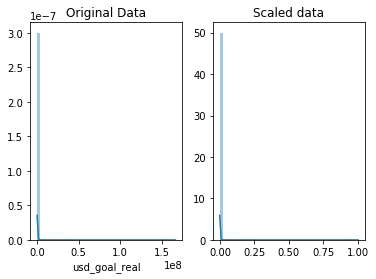

In [3]:
# select the usd_goal_real column
usd_goal = kickstarters_2017.usd_goal_real

# scale the goals from 0 to 1
scaled_data = minmax_scaling(usd_goal, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

# 1) Practice scaling

We just scaled the "usd_goal_real" column. What about the "goal" column?

Text(0.5, 1.0, 'Scaled data')

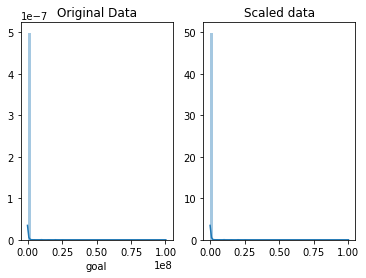

In [4]:
# Your turn! 
usd_goal = kickstarters_2017.goal

# scale the goals from 0 to 1
scaled_data = minmax_scaling(usd_goal, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(kickstarters_2017.goal, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

## TODO: question 2 check

# 2) Practice normalization

Now let's try practicing normalization. We're going to normalize the amount of money pledged to each campaign.

Text(0.5, 1.0, 'Normalized data')

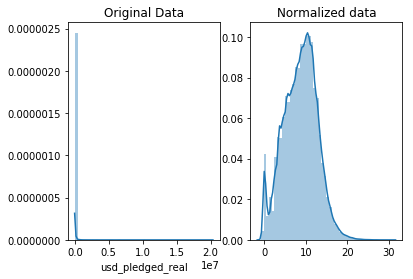

In [5]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

We used the "usd_pledged_real" column. What about the "pledged" column? Does it have the same info?

Text(0.5, 1.0, 'Normalized data')

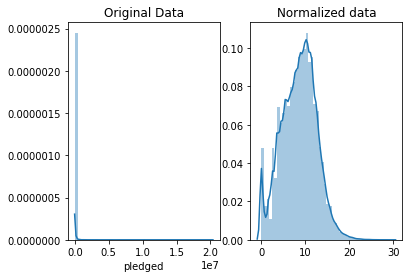

In [7]:
# Your turn! 
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.pledged > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.pledged.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

## TODO: question 3 check

It's not perfect (it looks like a lot pledges got very few pledges) but it is much closer to normal!

# 3) Normalization or scaling?

For each of the following examples, decide whether scaling or normalization makes more sense. 

* You want to build a linear regression model to predict someone's grades given how much time they spend on various activities during a normal school week.  You notice that your measurements for how much time students spend studying aren't normally distributed: some students spend almost no time studying and others study for four or more hours every day. Should you scale or normalize this variable?
* You're still working on your grades study, but you want to include information on how students perform on several fitness tests as well. You have information on how many jumping jacks and push-ups each student can complete in a minute. However, you notice that students perform far more jumping jacks than push-ups: the average for the former is 40, and for the latter only 10. Should you scale or normalize these variables?

In [ ]:
# q_3 check

# (Optional) More practice

Try finding a new dataset and pretend you're preparing to perform a [regression analysis](https://www.kaggle.com/rtatman/the-5-day-regression-challenge). 

[These datasets are a good start!](https://www.kaggle.com/rtatman/datasets-for-regression-analysis)

Pick three or four variables and decide if you need to normalize or scale any of them and, if you think you should, practice applying the correct technique.

# Keep going

In the next lesson, learn how to [**parse dates**](#$NEXT_NOTEBOOK_URL$) in a dataset.